## Dowload and extract weight parameters of AlexNet

Simple script to extract weights of trained AlexNet

@author: Swaroop Guntupalli <swaroopgj@gmail.com>

In [1]:
import urllib
import numpy as np
import tensorflow as tf
import os

In [2]:
def get_data():
    fname = 'bvlc_alexnet.npy'
    if not os.path.exists(fname):
        url = 'http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/bvlc_alexnet.npy'
        urllib.urlretrieve(url, fname)
    return np.load(fname).item()
    

In [3]:
net_params = get_data()

In [4]:
net_params.keys()

[u'fc6', u'fc7', u'fc8', u'conv3', u'conv2', u'conv1', u'conv5', u'conv4']

In [5]:
def get_weights(key):
    """
    Returns a tuple (weights, biases)
    key can be one of [u'fc6', u'fc7', u'fc8', u'conv3', u'conv2', u'conv1', u'conv5', u'conv4']
    """
    return (net_params.get(key)[0], net_params.get(key)[1])

In [6]:
print "Example weights shape for fc8", get_weights('fc8')[0].shape

Example weights shape for fc8 (4096, 1000)


In [7]:
print "Example weights shape for conv1", get_weights('conv1')[0].shape

Example weights shape for conv1 (11, 11, 3, 96)


In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
conv1_weights = get_weights('conv1')[0]
nfilters = conv1_weights.shape[2]*conv1_weights.shape[3]
canvas = np.zeros((conv1_weights.shape[0]*8, conv1_weights.shape[1]*12, 3), 'float16')
for depth in range(96):
    x = depth/12
    y = depth%12
    #print x,y,depth
    cw = conv1_weights[:,:,:,depth] - conv1_weights[:,:,:,depth].min()
    cw = cw/cw.max()
    canvas[11*x:11*(x+1), 11*y:11*(y+1), :] = cw

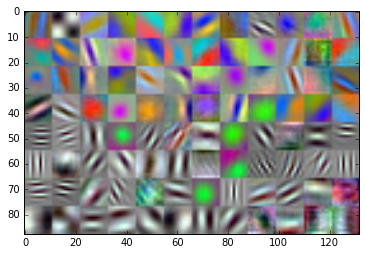

In [10]:
plt.imshow(canvas)